In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingClassifier,BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix, roc_curve,auc,f1_score,mean_squared_error,log_loss
import pickle
import joblib
df=pd.read_csv(r"C:\Users\Smruti\Downloads\insomnia\EEG_DATA.csv")

In [2]:
df.head()

,Alpha2,Beta0,Beta1,Beta2,Beta3,Delta0,Delta1,Delta2,Delta3,Delta5,Low0,Low1,Low2,Low3,Low5,Insomnia
0,5.19,2.82,1.90,1.08,0.61,7.97,6.03,8.44,13.50,6.33,4.97,4.45,5.43,7.63,3.73,1
1,-0.32,0.75,0.21,0.54,0.46,5.56,3.13,2.13,0.98,1.92,2.43,1.31,0.57,0.14,0.97,1
2,2.20,1.69,1.36,1.14,1.06,8.51,5.66,6.72,8.55,5.95,4.09,2.76,3.39,3.93,2.78,1
3,1.23,1.75,0.77,1.01,0.88,5.21,4.97,5.37,5.28,3.36,3.03,2.59,2.41,2.28,2.08,1
4,4.76,2.59,2.42,2.07,1.73,10.38,9.12,10.88,15.70,7.79,5.70,5.10,6.01,7.69,3.74,1


In [3]:
df.isnull().sum()

Alpha2      0
Beta0       0
Beta1       0
Beta2       0
Beta3       0
Delta0      0
Delta1      0
Delta2      0
Delta3      0
Delta5      0
Low0        0
Low1        0
Low2        0
Low3        0
Low5        0
Insomnia    0
dtype: int64

In [4]:
df.describe()

,Alpha2,Beta0,Beta1,Beta2,Beta3,Delta0,Delta1,Delta2,Delta3,Delta5,Low0,Low1,Low2,Low3,Low5,Insomnia
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.826720,1.317550,0.994670,0.913510,0.787570,6.655300,4.906290,5.406470,6.581290,4.467330,3.219980,2.541210,2.729930,3.14623,2.206690,0.500000
std,1.509481,0.887735,0.675036,0.525952,0.485279,2.954552,1.761794,2.350892,3.878686,1.819662,1.602882,1.123772,1.504709,2.17403,0.920895,0.500125
min,-3.070000,-1.580000,-1.440000,-0.770000,-0.790000,-1.710000,-1.060000,-3.320000,-7.950000,-1.720000,-2.170000,-1.430000,-2.740000,-4.46000,-1.010000,0.000000
25%,0.820000,0.710000,0.560000,0.540000,0.460000,4.647500,3.717500,3.915000,4.000000,3.280000,2.127500,1.777500,1.710000,1.70750,1.590000,0.000000
50%,1.870000,1.315000,1.000000,0.920000,0.790000,6.555000,4.880000,5.365000,6.535000,4.480000,3.210000,2.505000,2.710000,3.16000,2.220000,0.500000
75%,2.922500,1.910000,1.450000,1.240000,1.100000,8.680000,6.060000,6.962500,9.250000,5.622500,4.290000,3.310000,3.752500,4.69000,2.820000,1.000000
max,6.470000,4.120000,3.170000,2.540000,2.430000,15.450000,10.050000,12.390000,19.270000,10.030000,8.130000,6.010000,7.420000,10.19000,4.970000,1.000000


In [5]:
df.Insomnia.value_counts()

Insomnia
1    1000
0    1000
Name: count, dtype: int64

In [6]:
x=df.iloc[:,15:]
y=df.iloc[:,1]

In [7]:
np.random.seed(42)
X, y = make_classification(n_samples=100,
    n_features=10,
    n_informative=2,  
    n_redundant=0,    
    n_classes=2,
    random_state=0)
y_class = np.where(y > np.median(y), 1, 0)

In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=0)

In [9]:
print(f"shape of x_test is{x_test.shape}")
print(f"shape of x_train is{x_train.shape}")
print(f"shape of y_test is{y_test.shape}")
print(f"shape of y_train is{y_train.shape}")

shape of x_test is(20, 10)
shape of x_train is(80, 10)
shape of y_test is(20,)
shape of y_train is(80,)


In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
alpha = 1.0
ridge_reg_regularized = Ridge(alpha=alpha)
ridge_reg_regularized.fit(x_train_scaled, y_train)

# Accuracy after regularization
regularized_predictions = ridge_reg_regularized.predict(x_test_scaled).round().astype(int)
regularized_accuracy = accuracy_score(y_test, regularized_predictions)
print("Accuracy after Regularization:", regularized_accuracy)

Accuracy after Regularization: 0.8


In [12]:
#SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, gamma='scale')
svm_classifier.fit(x_train_scaled, y_train)


SVC(kernel='linear')

In [13]:
y_pred=svm_classifier.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.85


In [14]:
#rfc= RandomForestClassifier(max_depth=3,criterion='gini',min_samples_split=2,min_samples_leaf=1,max_features=None)

In [15]:
#rfc.fit(x_train_scaled,y_train)

In [16]:
#y_pred = rfc.predict(x_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

In [17]:
#from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier()

In [18]:
#training the model
#dt.fit(x_train, y_train)

In [19]:
clf = BaggingClassifier( n_estimators=50, random_state=0)
clf.fit(x_train_scaled, y_train)

BaggingClassifier(n_estimators=50, random_state=0)

In [20]:
y_pred = clf.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Model Accuracy Score:", accuracy_score(y_test, y_pred))
print("Model F1 score:", f1_score(y_test, y_pred))
print("Model Precision:", precision_score(y_test, y_pred))
print("Model Recall:", recall_score(y_test, y_pred))
print("Model Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Model Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Model Log Loss:", log_loss(y_test, y_pred))

Model Accuracy Score: 0.9
Model F1 score: 0.8571428571428571
Model Precision: 0.8571428571428571
Model Recall: 0.8571428571428571
Model Mean Absolute Error: 0.1
Model Mean Squared Error: 0.1
Model Log Loss: 3.604365338911715


Matplotlib is building the font cache; this may take a moment.


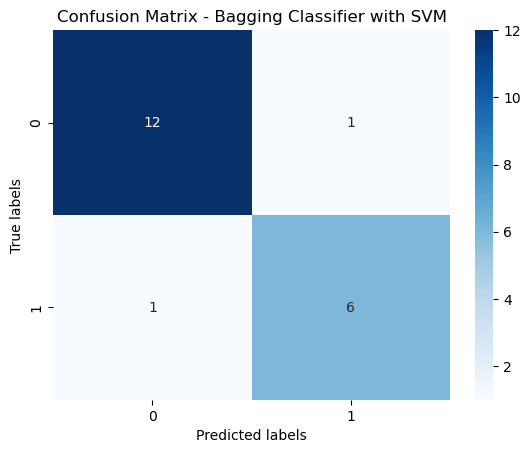

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_ad = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_ad, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Bagging Classifier with SVM')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

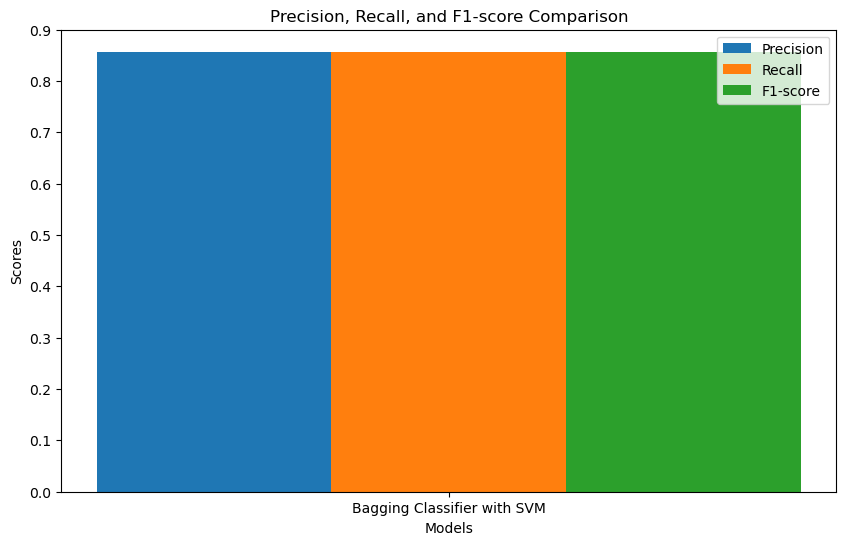

In [23]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Bagging Classifier with SVM']
precision = [precision_score(y_test, y_pred)]
recall = [recall_score(y_test, y_pred)]
f1 = [f1_score(y_test, y_pred)]

bar_width = 0.25
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

precision_bar = ax.bar(index, precision, bar_width, label='Precision')
recall_bar = ax.bar(index + bar_width, recall, bar_width, label='Recall')
f1_bar = ax.bar(index + 2 * bar_width, f1, bar_width, label='F1-score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [24]:
joblib.dump(rfc, 'random_forest_model.EEG_Data')

NameError: name 'rfc' is not defined

In [ ]:
random_forest_model = joblib.load('random_forest_model.EEG_Data')

In [ ]:
data1=pd.read_csv(r"D:\Users\siddh\Desktop\study materials\ML proj\eeg_data1.csv")

In [ ]:
y_pred_new = random_forest_model.predict(data1)

In [ ]:
print(y_pred_new)

In [ ]:
data2=pd.read_csv(r"D:\Users\siddh\Desktop\study materials\ML proj\eeg_data2.csv")

In [ ]:
y_pred_= random_forest_model.predict(data2)

In [ ]:
print(y_pred_)

In [ ]:
data3=pd.read_csv(r"D:\Users\siddh\Desktop\study materials\ML proj\eeg_data3.csv")

In [ ]:
y_pred = random_forest_model.predict(data3)

In [ ]:
print(y_pred)

In [ ]:
ones_count = np.count_nonzero(y_pred_new)
zeros_count = y_pred_new.size - ones_count

In [ ]:
if(ones_count>zeros_count):
    print(1)
else:
    print(0)

In [ ]:
print(y_pred_new)